In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import ttest_power

### Reading Data from xls file

In [27]:
data = pd.read_excel("SM4-Golf.xls")

### Describing the Data

In [28]:
data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


## Fetching Each Data Model
### Current and New

In [29]:
current_data = data.Current
new_data = data.New

### Describing Data Models

In [30]:
current_data.describe()

count     40.000000
mean     270.275000
std        8.752985
min      255.000000
25%      263.000000
50%      270.000000
75%      275.250000
max      289.000000
Name: Current, dtype: float64

In [31]:
new_data.describe()

count     40.000000
mean     267.500000
std        9.896904
min      250.000000
25%      262.000000
50%      265.000000
75%      274.500000
max      289.000000
Name: New, dtype: float64

### Check for Distribution

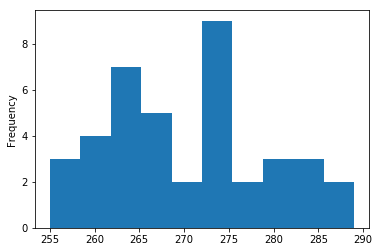

In [32]:
current_data.plot.hist()

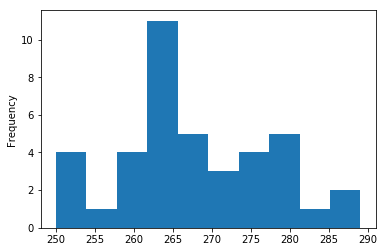

In [33]:
new_data.plot.hist()

## Null hypothesis 
### H0 = "Current Golf Balls have better driving distance that New Golf Balls"


### Check for Normality & Variance criteria

In [34]:
# Shapiro-Wilk normality test for Current Data 
w_current, probab_current  = stats.shapiro(current_data.dropna())
w_current, probab_current

(0.9707046747207642, 0.378787100315094)

In [35]:
# Shapiro-Wilk normality test for New Data 
w_new, probab_new = stats.shapiro(new_data.dropna())
w_new, probab_new 

(0.9678263664245605, 0.3064655363559723)

### Since probability values(probab_new and probab_current)  > 0.05 for both data sets, they both conform to the normality criterion

In [36]:
# Levene variance test for Current and New data 
stats.levene(current_data.dropna(), new_data.dropna())

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

### As p > 0.05 the data sets conform to the variance criterion

In [37]:
tval, pVal = stats.ttest_ind(current_data, new_data)
tval,pVal

(1.3283615935245678, 0.18793228491854663)

### Interpretation of the outcome
### Since p > a (0.05) we say that the null hypothesis is accepted 
### Hence  Conclusion : Current Golf Balls have better driving distance that New Golf Balls

####################### 

### Calculating pooled Standard Deviation  

In [38]:
pSd = (current_data.mean() - new_data.mean())/np.sqrt(((len(current_data)-1)*np.var(current_data) + (len(new_data)-1)*np.var(new_data)) / len(current_data)+len(new_data)-2)
pSd

0.19431534815781365

In [45]:
delta = round(pSd, 2)
delta

0.19

### Calculating Sample power

In [47]:
sample_power = ttest_power(delta, nobs=len(current_data), alpha=0.05, alternative="two-sided")
sample_power

0.21628588242534494

### Hence there is 21% probability that Null hypothesis can be rejected